In [18]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [44]:
#Importing Dataset
dataset = pd.read_csv("healthcare-dataset-stroke-data.csv")
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [45]:
dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [47]:
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [48]:
#BMI has missing vaalues. We will fill them with Mean BMI.
dataset['bmi'] = dataset['bmi'].fillna(dataset['bmi'].mode().iloc[0])

In [49]:
dataset.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [50]:
#checking value counts for the target
print(dataset['stroke'].value_counts())

0    4861
1     249
Name: stroke, dtype: int64


C:\Users\bjish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='count'>

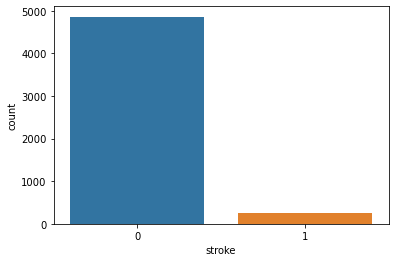

In [51]:
#Plotting the Target Variable
sns.countplot(dataset['stroke'])

In [52]:
#We can see that the dataset is highly imbalanced, which will 
#cause the model to be biased towards the no stroke data and hence
# affect prediction.

In [53]:
#converting the categorical columns to that with numeric value

dataset['gender'] = dataset['gender'].astype('category').cat.codes
dataset['ever_married'] = dataset['ever_married'].astype('category').cat.codes
dataset['work_type'] = dataset['work_type'].astype('category').cat.codes
dataset['Residence_type'] = dataset['Residence_type'].astype('category').cat.codes
dataset['smoking_status'] = dataset['smoking_status'].astype('category').cat.codes

In [54]:

dataset.head()
dataset.info() #information on the characteristics of the datasset



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int8   
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int8   
 6   work_type          5110 non-null   int8   
 7   Residence_type     5110 non-null   int8   
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   int8   
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), int8(5)
memory usage: 304.5 KB


<AxesSubplot:>

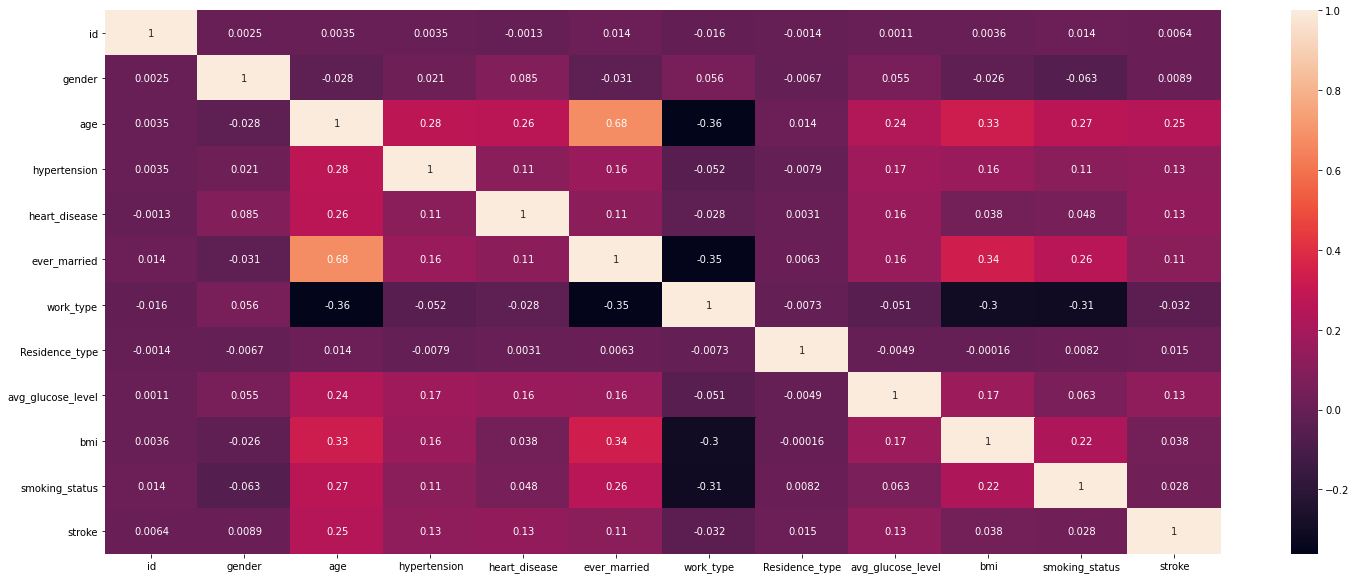

In [55]:
plt.figure(figsize = (25,10)) 

sns.heatmap(dataset.corr(),annot = True) #visualization of the numerical correlation of each feature of the dataset

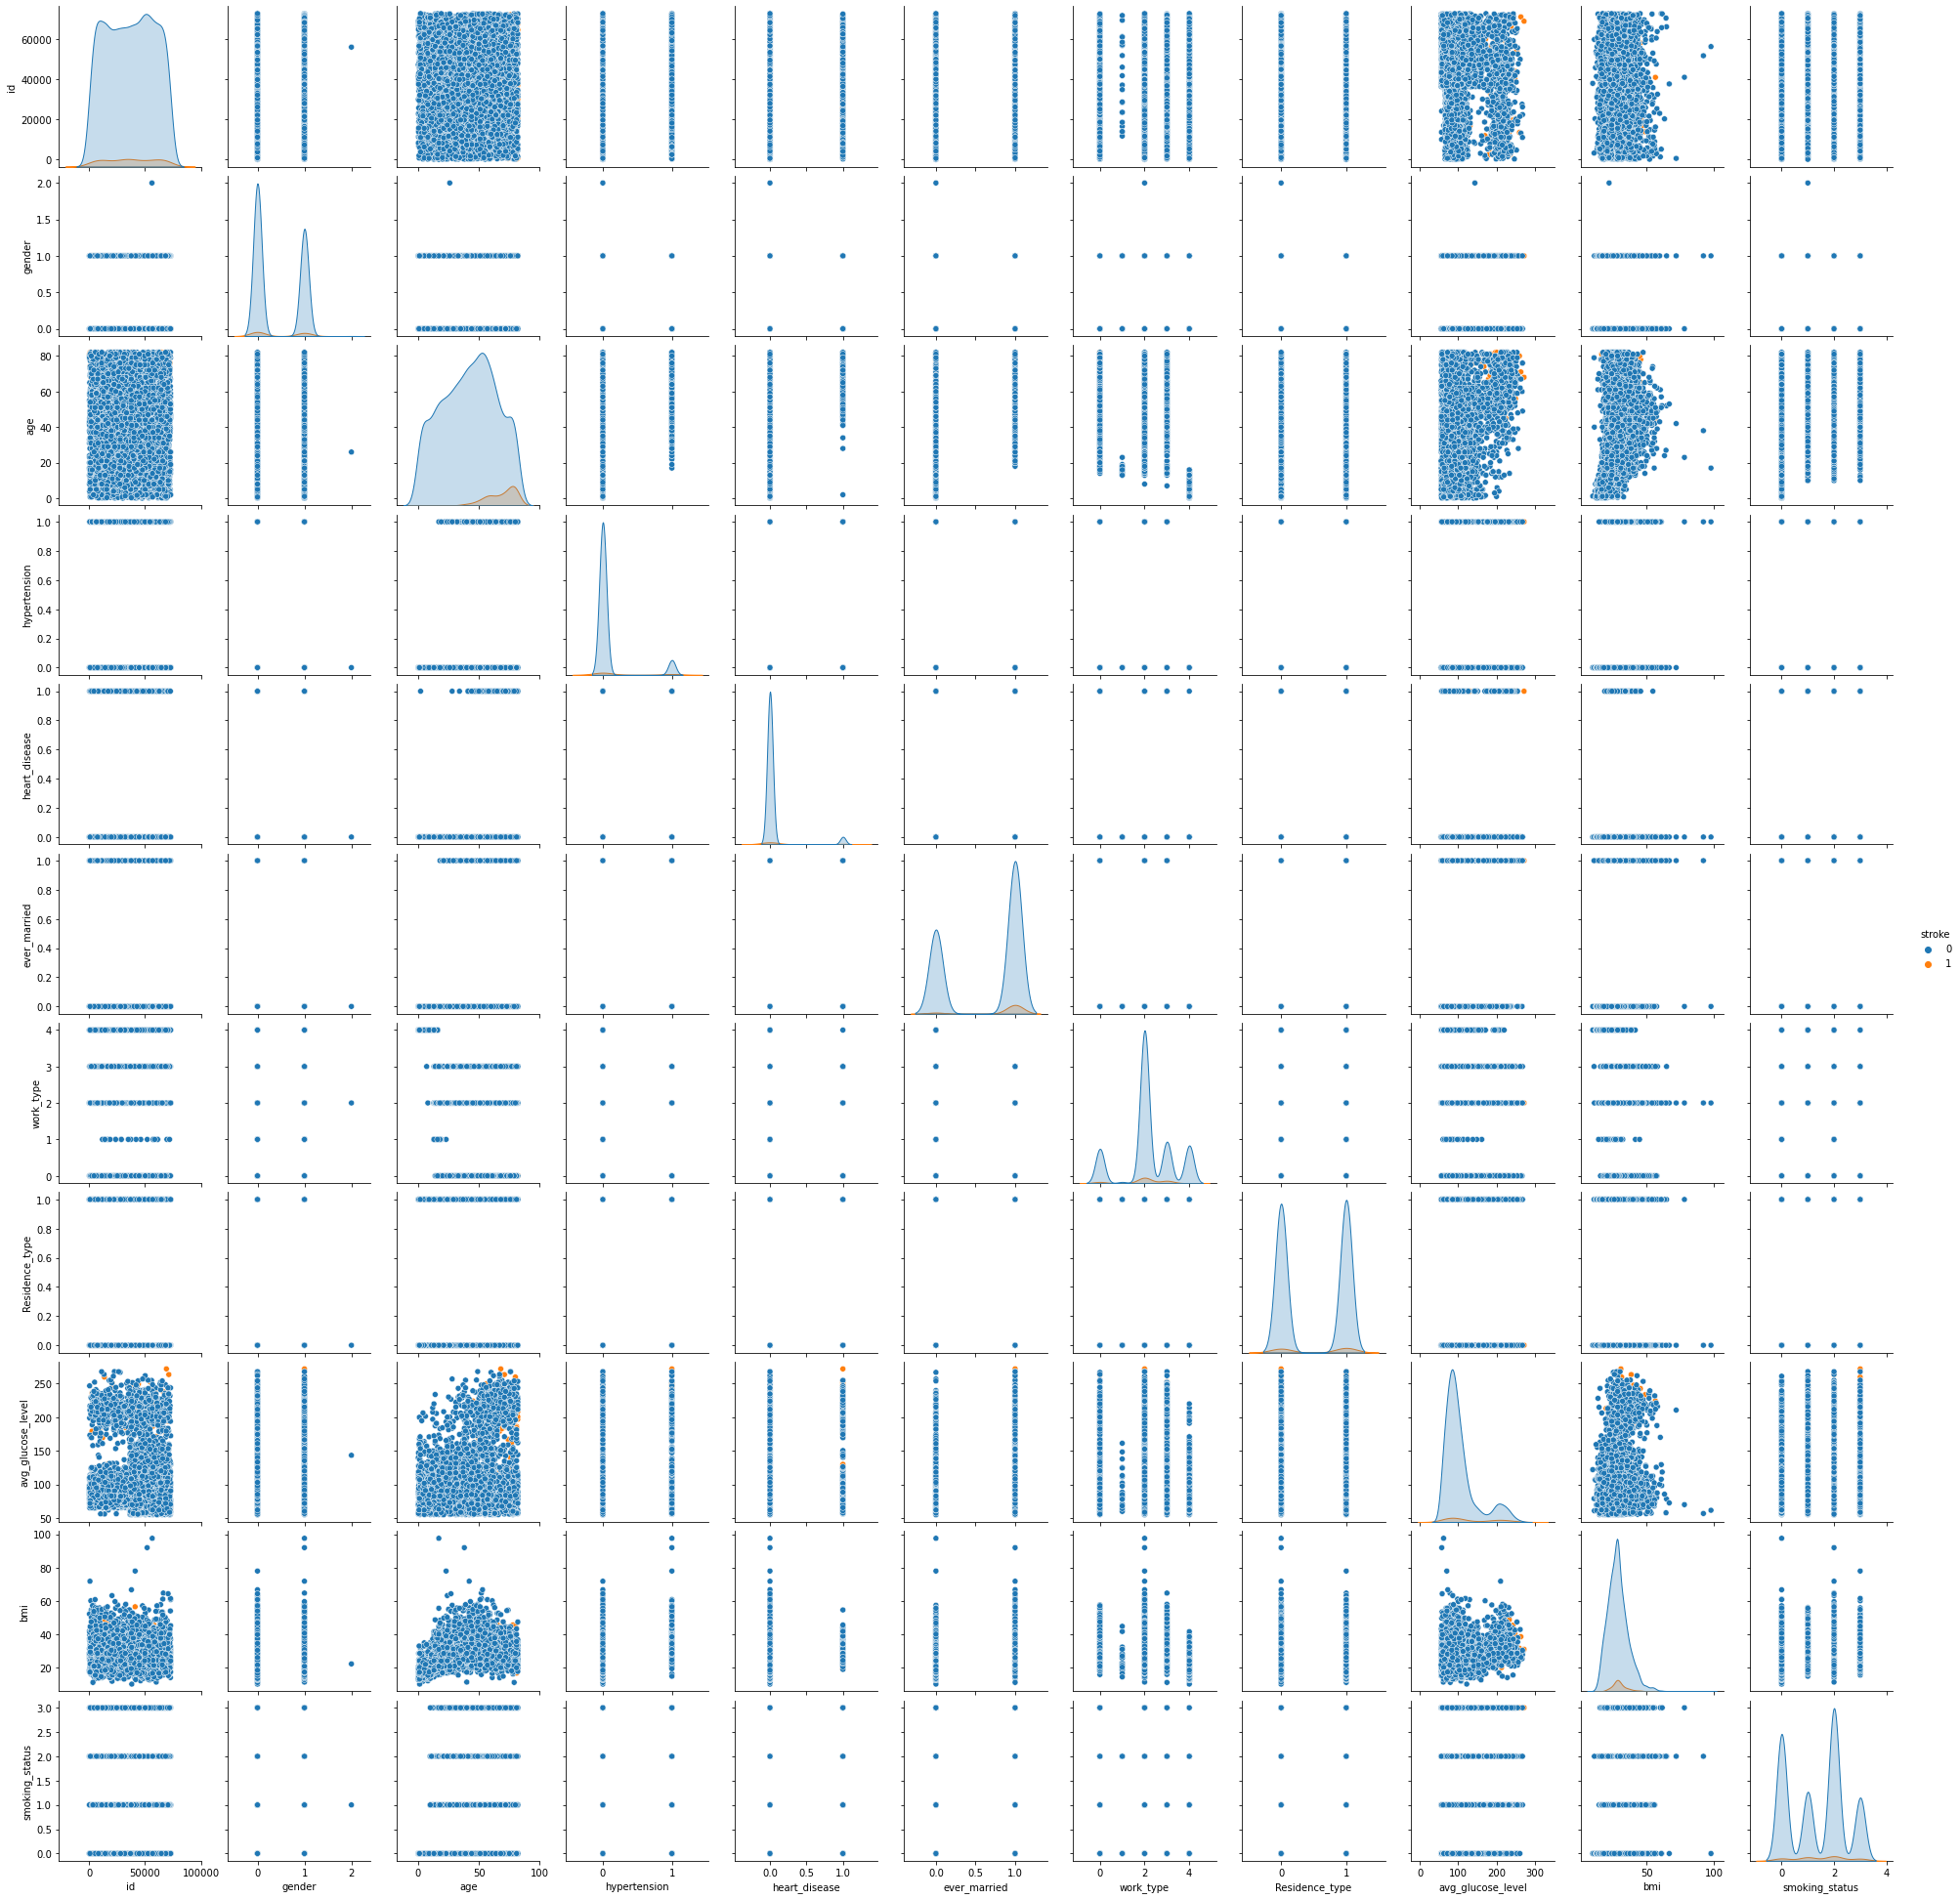

In [56]:


sns.pairplot(dataset, kind = 'scatter', diag_kind= 'kde',hue = 'stroke')
#for distribution and relationship of each feature



In [57]:
#from correlation plot, the age and ever married column are highly
# correlated 
# we will drop the ever married column 
dataset_copy = dataset.drop(columns = ['ever_married'], axis = 1)


In [58]:
#Preprocessing 

X = dataset_copy.drop('stroke', axis = 1)  # all columns except the target column
y = dataset_copy['stroke'] #target column
#splittiing into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [59]:
print(X_train.shape)
print(X_test.shape)

(3577, 10)
(1533, 10)


(6808, 10)


C:\Users\bjish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='count'>

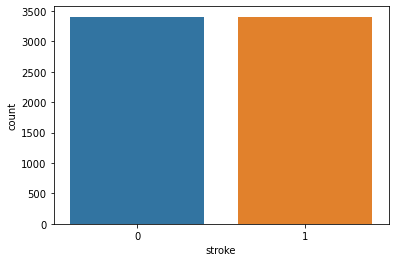

In [60]:
#Since we have an imbalanced target, we will use SMOTE 
#Synthetiic Minority Over-Sampling Technique
from imblearn.over_sampling import SMOTE
#SMOTE Is an oversampling technqiue that generates
# synthetic samples from the dataset to increase
# predictive power for minority claasses

smote = SMOTE()

X_smote, y_smote = smote.fit_resample(X_train,y_train)

print(X_smote.shape)

sns.countplot(y_smote)

In [61]:
testing = X_test['id'] #taking ID column for the purpose of submission

In [62]:
#drop id columns for training and test set
X_smote = X_smote.drop(columns = ['id'])
X_test = X_test.drop(columns = ['id'])


In [64]:
#Scaling the data with min max scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_smote = scaler.fit_transform(X_smote) 

X_test = scaler.transform(X_test)


In [65]:
#Building Models

In [68]:
#Logistic Regression 
from sklearn.linear_model import LogisticRegression

logR = LogisticRegression()
logR.fit(X_smote,y_smote)


pred = logR.predict(X_test)

In [73]:
# import the metrics used for evaluation from sklearn library
from sklearn.metrics import (f1_score, roc_auc_score,accuracy_score,
                             precision_recall_curve, auc, roc_curve, recall_score)
from sklearn.metrics import classification_report, confusion_matrix

clf_log = classification_report(y_test, pred) #get classification report for performance of the logistic model
print(clf_log)

              precision    recall  f1-score   support

           0       0.97      0.78      0.87      1457
           1       0.12      0.59      0.21        76

    accuracy                           0.77      1533
   macro avg       0.55      0.69      0.54      1533
weighted avg       0.93      0.77      0.83      1533



In [75]:
#confusion matrix for prediction
cm = confusion_matrix(y_test, pred)
print(cm)

[[1140  317]
 [  31   45]]


In [77]:
#Voting Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  VotingClassifier 
from sklearn.ensemble import RandomForestClassifier

rdf = RandomForestClassifier(random_state = 0) #base random forest model

dt = DecisionTreeClassifier(random_state = 0) #base decision tree model

voting = VotingClassifier(estimators = [('tree',dt), #build the voting model with decision tree and random forest 
                                        #as the two base sub model
          ('rdf', rdf)],
         voting = 'soft')
          
          
voting.fit(X_smote, y_smote) #fit the classifier on the resampled training data

VotingClassifier(estimators=[('tree', DecisionTreeClassifier(random_state=0)),
                             ('rdf', RandomForestClassifier(random_state=0))],
                 voting='soft')

In [78]:
dtc, rd = voting.estimators_ #get the estimators for the two sub model

#check performance of the voting classifier and the ones for the individuals

#print the score for the individual model
print(voting.score(X_test, y_test))
print(dtc.score(X_test, y_test))
print(rd.score(X_test, y_test))

0.8506196999347684
0.8506196999347684
0.8656229615133725


In [79]:
#get the performance of the voting model on the prediction 
#as compared to the y_test values as classification report
clf_v = classification_report(y_test, voting.predict(X_test))
print(clf_v)

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1457
           1       0.10      0.25      0.14        76

    accuracy                           0.85      1533
   macro avg       0.53      0.57      0.53      1533
weighted avg       0.91      0.85      0.88      1533



In [80]:
#confusion matrix for the prediction
cv = confusion_matrix(y_test, voting.predict(X_test))
cv

array([[1285,  172],
       [  57,   19]], dtype=int64)

In [81]:
#get the performance of the random forest model on the prediction 
#as compared to the y_test values as classification report

clf_r = classification_report(y_test, rd.predict(X_test))
print(clf_r) #print the report

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      1457
           1       0.09      0.20      0.13        76

    accuracy                           0.87      1533
   macro avg       0.52      0.55      0.53      1533
weighted avg       0.91      0.87      0.89      1533



In [82]:
#confusion matrix for the prediction
cr = confusion_matrix(y_test, rd.predict(X_test))
cr

array([[1312,  145],
       [  61,   15]], dtype=int64)

In [88]:
#XGBoost Model
import xgboost as xgb
xg = xgb.XGBClassifier()
xg.fit(X_smote, y_smote)

xg_pred = xg.predict(X_test)

[22:34:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [90]:
clf_x = classification_report(y_test, xg_pred) #get the performance of the xgboost model on the 
#prediction as compared to the y_test values as classification report 
print(clf_x)

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1457
           1       0.14      0.14      0.14        76

    accuracy                           0.91      1533
   macro avg       0.55      0.55      0.55      1533
weighted avg       0.91      0.91      0.91      1533



In [92]:
#confusion matrix for the predictions using the xgboost model
cx = confusion_matrix(y_test, xg_pred)
cx

array([[1390,   67],
       [  65,   11]], dtype=int64)

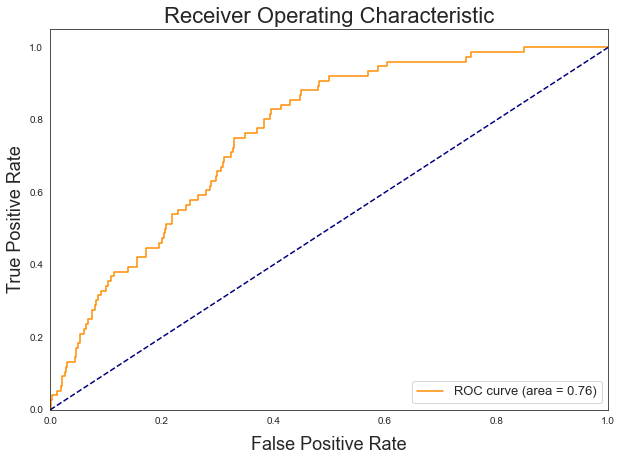

In [93]:
xgprd = xg.predict_proba(X_test)[:,1]

#Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
fpr_log, tpr_log, _ = roc_curve(y_test, xgprd)
roc_auc_log = auc(fpr_log, tpr_log)

#plot the AUC_ROC area
sns.set_style("white")
plt.figure(figsize=(10, 7)) #to set the size of the figure generated
plt.plot(fpr_log, tpr_log, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc_log)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.xlim([0.0, 1.0])#value range and limit on x axis
plt.ylim([0.0, 1.05]) #value range and limit on y axis

plt.xlabel('False Positive Rate',fontsize=18,labelpad =10) #Label for x axis
plt.ylabel('True Positive Rate',fontsize=18) #Label for y axis

plt.title('Receiver Operating Characteristic',fontsize=22).set_position([.5, 1.02]) #Plot title
plt.legend(loc="lower right",fontsize=13)
plt.show()

In [95]:
submission = pd.DataFrame({'Id': testing, 'Stroke': xg_pred}) #form a dataframe with only the id and predictions column
submission.to_csv('submission.csv', index=False) #make the dataframe into a csv file  
submission = pd.read_csv('submission.csv')
submission

,Id,Stroke
0,61960,0
1,31741,0
2,59451,0
3,40670,0
4,25391,0
...,...,...
1528,36618,0
1529,72915,0
1530,10997,0
1531,20316,0
